In [11]:
import pickle

In [2]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt 
import re

plt.style.use('ggplot')

# save_fname = sys.argv[1]
# C:\Users\Pavan kumar.V\Desktop\FINAL_PROJECT_RUN\RESULTS\dset-mnist_alg-fedavg_C-0.5_B-20_T-200_E-1_device-gpu_W-200_lr-0.1_noisy_frac-0.0_bn_private-none.pkl
fnames      = ["C:\\Users\\Pavan kumar.V\\Desktop\\FINAL_PROJECT_RUN\\RESULTS\\dset-mnist_alg-fedavg_C-0.5_B-20_T-200_E-1_device-gpu_W-200_lr-0.1_noisy_frac-0.0_bn_private-none.pkl",
                        "C:\\Users\\Pavan kumar.V\\Desktop\\FINAL_PROJECT_RUN\\RESULTS\\dset-mnist_alg-fedavg_C-0.5_B-20_T-200_E-1_device-gpu_W-200_lr-0.1_noisy_frac-0.0_bn_private-yb.pkl",
                        "C:\\Users\\Pavan kumar.V\\Desktop\\FINAL_PROJECT_RUN\\RESULTS\\dset-mnist_alg-perfedavg_C-0.5_B-20_T-200_E-1_device-gpu_W-200_lr-0.1_noisy_frac-0.0_beta-0.1.pkl",
                        "C:\\Users\\Pavan kumar.V\\Desktop\\FINAL_PROJECT_RUN\\RESULTS\\\dset-mnist_alg-pfedme_C-0.5_B-20_T-200_E-1_device-gpu_W-200_lr-0.3_noisy_frac-0.0_beta-1.0_lamda-1.0.pkl"


]




(0.0, 200.0)

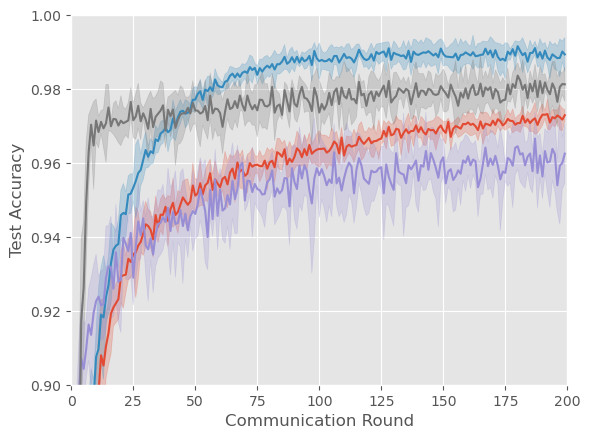

In [5]:
t_values_95 = [12.71, 4.303, 3.182, 2.776, 2.571, 2.447, 2.365, 2.306, 2.262]

for fname in fnames:
    with open(fname, 'rb') as f:
        data = pickle.load(f)
    
    num_trials = len(data)
    
    if num_trials < 2 or num_trials > 10:
        print('{} has n = {} trials, should be 2 <= n <= 10'.format(fname, num_trials))
        quit()
    
    T         = int(re.findall(r'_T-\d+_', fname)[0].split('-')[1][:-1])    
    test_accs = np.zeros((num_trials, T), dtype=np.float32)
    
    for (i, seed) in enumerate(data.keys()):
        test_accs[i] = data[seed][-1]
    
    avg_accs = np.mean(test_accs, axis=0)    
    t_value  = t_values_95[num_trials-2]
    conf_int = t_value * np.std(test_accs, axis=0) / (num_trials ** 0.5) 
    
    line     = plt.plot(avg_accs, label=fname)[0]
    
    plt.fill_between(   np.arange(avg_accs.shape[0]), 
                        avg_accs-conf_int, 
                        avg_accs+conf_int, 
                        color=line.get_color(), 
                        alpha=0.25)
plt.xlabel('Communication Round')
plt.ylabel('Test Accuracy')
plt.ylim([0.9, 1.0])
plt.xlim([0, 200])
# plt.savefig(save_fname)
    
